In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt


# Fetch stock data
ticker_symbol = "AAPL"
data = yf.download(ticker_symbol, period="5y", interval="1d")

# Display first few rows
print(data.head())


/tmp/ipython-input-1127395930.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker_symbol, period="5y", interval="1d")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2020-08-12  109.926842  110.184611  107.288343  107.482884  165598000
2020-08-13  111.872261  112.876593  110.819290  111.308083  210082000
2020-08-14  111.772568  111.862543  109.960878  111.697183  165565200
2020-08-17  111.480751  112.920377  110.853351  112.896057  119561600
2020-08-18  112.409698  112.835263  110.897122  111.232711  105633600


In [2]:
data.shape

(1255, 5)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2020-08-12 to 2025-08-11
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1255 non-null   float64
 1   (High, AAPL)    1255 non-null   float64
 2   (Low, AAPL)     1255 non-null   float64
 3   (Open, AAPL)    1255 non-null   float64
 4   (Volume, AAPL)  1255 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.8 KB


In [4]:
data.isnull().sum()

,,0
Price,Ticker,
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


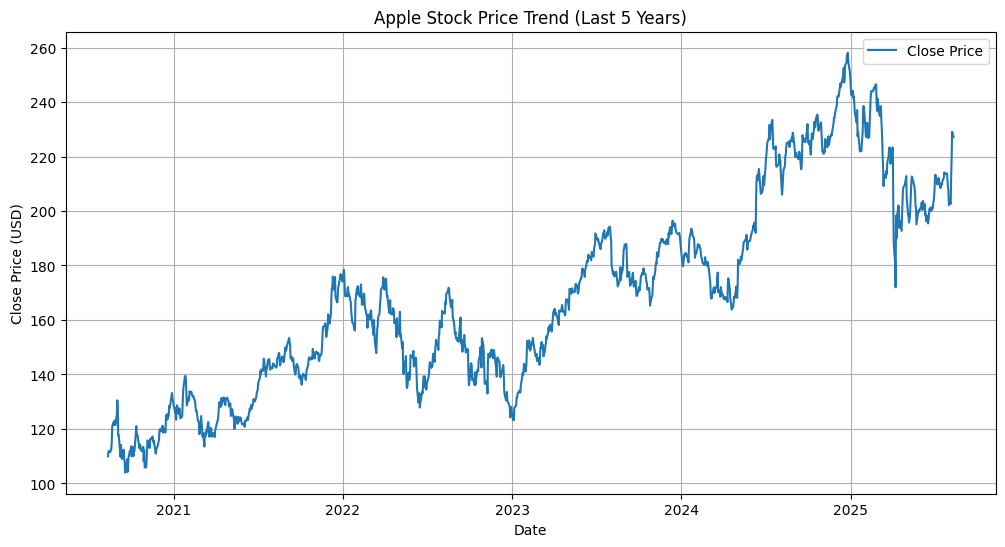

In [5]:
# Plot historical price trend
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Close Price')
plt.title('Apple Stock Price Trend (Last 5 Years)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


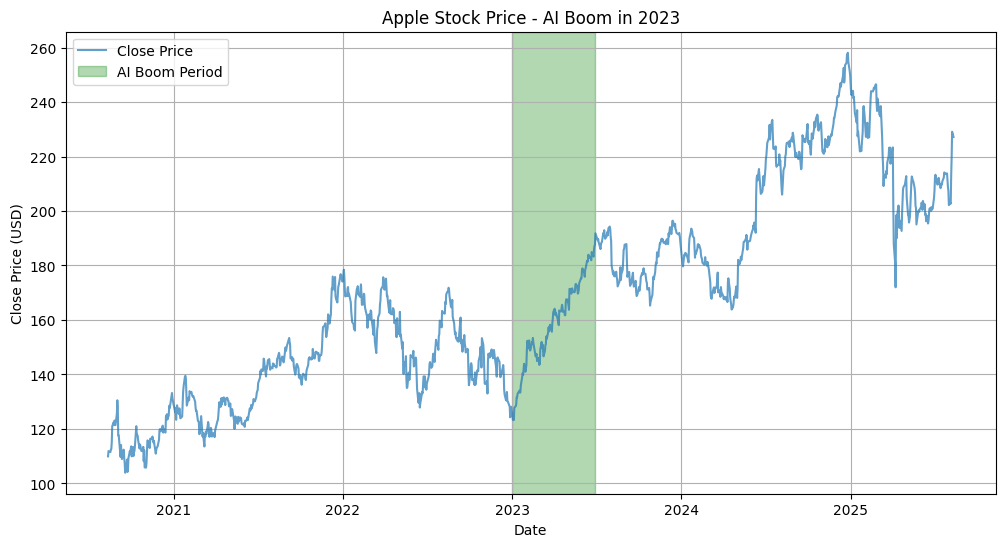

Average price before AI boom: Ticker
AAPL    135.44
dtype: float64
Average price during AI boom: Ticker
AAPL    158.93
dtype: float64
Average price after AI boom: Ticker
AAPL    190.17
dtype: float64


In [7]:
import datetime as dt
import matplotlib.pyplot as plt

# AI boom period: Jan 2023 - Jun 2023
ai_start = dt.datetime(2023, 1, 1)
ai_end = dt.datetime(2023, 6, 30)

# Filter AI boom data
ai_data = data.loc[ai_start:ai_end]

# Plot with highlight
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Close Price', alpha=0.7)
plt.axvspan(ai_start, ai_end, color='green', alpha=0.3, label='AI Boom Period')
plt.title('Apple Stock Price - AI Boom in 2023')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Price analysis (fixed to avoid KeyError)
before_avg = data.loc[ai_start - dt.timedelta(days=30):ai_start]['Close'].mean()
during_avg = ai_data['Close'].mean()
after_avg = data.loc[ai_end:ai_end + dt.timedelta(days=30)]['Close'].mean()

print("Average price before AI boom:", round(before_avg, 2))
print("Average price during AI boom:", round(during_avg, 2))
print("Average price after AI boom:", round(after_avg, 2))


In [14]:
# Reset index to make 'Date' a column
data = data.reset_index()

# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Check for missing values
print("Missing values before handling:\n", data.isnull().sum())

# Fill missing values by forward fill (previous day's value)
data.fillna(method='ffill', inplace=True)

print("\nMissing values after handling:\n", data.isnull().sum())

# Add daily return column
data['Daily Return (%)'] = data['Close'].pct_change() * 100

# Show sample
print(data.head())


Missing values before handling:
 Price   Ticker
Date              0
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

Missing values after handling:
 Price   Ticker
Date              0
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64
Price        Date       Close        High         Low        Open     Volume  \
Ticker                   AAPL        AAPL        AAPL        AAPL       AAPL   
0      2020-08-10  109.776505  110.796584  107.120405  109.652340  212403600   
1      2020-08-11  106.511734  109.537883  106.251235  109.038802  187902400   
2      2020-08-12  110.051598  110.309660  107.410105  107.604866  165598000   
3      2020-08-13  111.999245  113.004717  110.945078  111.434426  210082000   
4      2020-08-14  111.899422  111.989499  110.085676  111.823951  165565200   

Price  Daily Return (%)  
Ticker                   
0                   NaN  

/tmp/ipython-input-2517779421.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


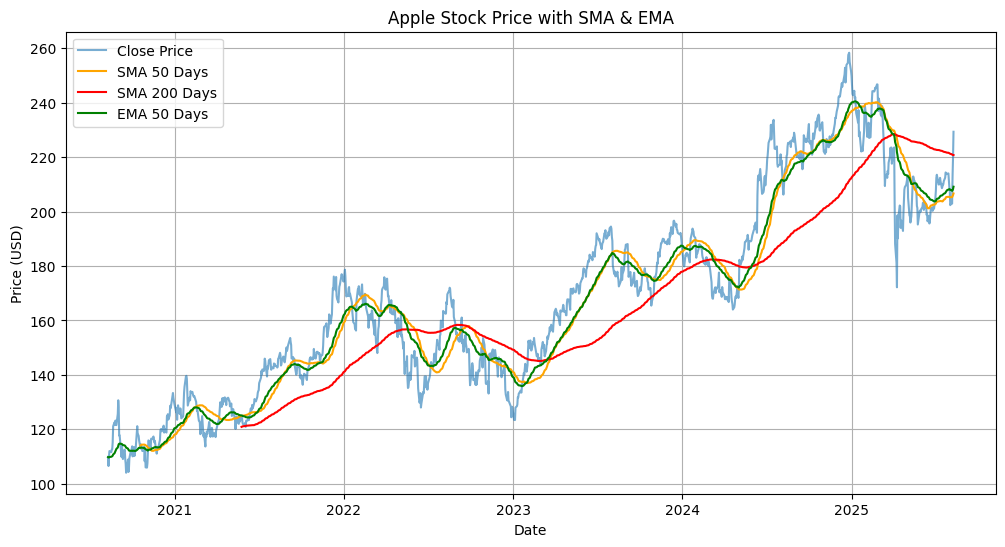

In [15]:
# Simple Moving Average (50 days and 200 days)
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Exponential Moving Average (50 days)
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()

# Plot SMA and EMA
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close'], label='Close Price', alpha=0.6)
plt.plot(data['Date'], data['SMA_50'], label='SMA 50 Days', color='orange')
plt.plot(data['Date'], data['SMA_200'], label='SMA 200 Days', color='red')
plt.plot(data['Date'], data['EMA_50'], label='EMA 50 Days', color='green')
plt.title('Apple Stock Price with SMA & EMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


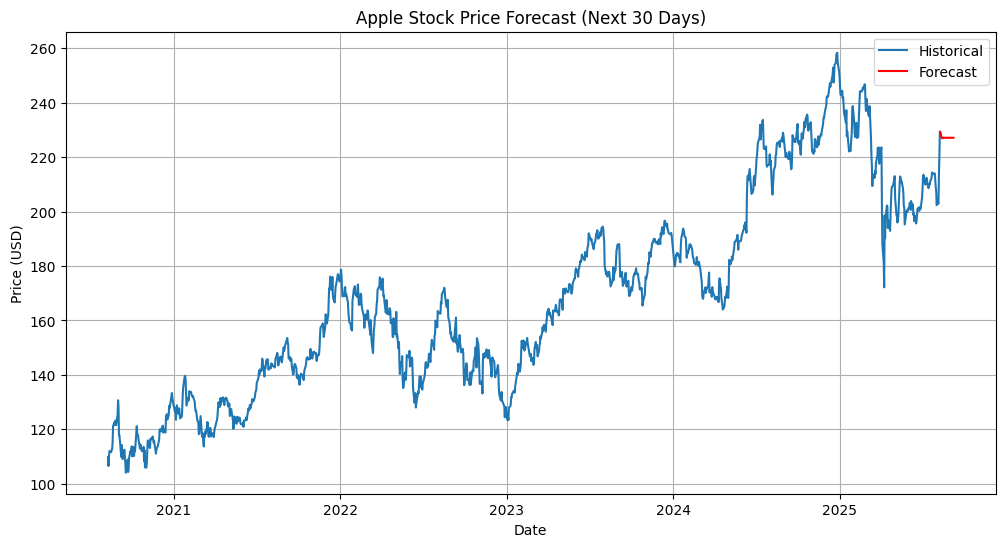

In [19]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Use only the 'Close' prices
close_prices = data['Close']

# Fit ARIMA model (order can be tuned)
model = ARIMA(close_prices, order=(5, 1, 0))
model_fit = model.fit()

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)

# Plot forecast
plt.figure(figsize=(12,6))
plt.plot(data['Date'], close_prices, label='Historical')
plt.plot(pd.date_range(start=data['Date'].iloc[-1], periods=31, freq='D')[1:], forecast, label='Forecast', color='red')
plt.title('Apple Stock Price Forecast (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()
